In [249]:
%matplotlib inline
import sys
sys.path.append("..")

import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from utils.average_spectra import average_dataframe
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [250]:
spectra_31 = pd.read_csv("../data/Unprocessed/2017-03-31.csv")
spectra_07 = pd.read_csv("../data/Unprocessed/2017-04-07.csv")
spectra_14 = pd.read_csv("../data/Unprocessed/2017-04-14.csv")
spectra_28 = pd.read_csv("../data/Unprocessed/2017-04-28.csv")
wp_df = pd.read_csv("../data/WaterPotential/Lettuce.csv")

#### 301-320 spectra was an error

In [251]:
spectra_14 = spectra_14.drop(spectra_14.columns[range(301, 321)], axis=1)
spectra_14.columns[[300, 301]]

Index(['SL14041700300.asd', 'SL14041700321.asd'], dtype='object')

In [252]:
def preprocess_spectra(df):
    return average_dataframe(df, 20).drop("Wavelengths", 1).as_matrix()

In [253]:
spectra_31_sub = preprocess_spectra(spectra_31)
spectra_07_sub = preprocess_spectra(spectra_07)[:,::3]
spectra_14_sub = preprocess_spectra(spectra_14)[:,::3]
spectra_28_sub = np.insert(preprocess_spectra(spectra_28), 32, np.zeros(751), axis=1)[:,::3]

In [254]:
print(spectra_31_sub.shape, spectra_07_sub.shape, spectra_14_sub.shape, spectra_28_sub.shape)

(751, 12) (751, 12) (751, 12) (751, 12)


In [255]:
spectra = np.zeros((48, 751))
spectra[:12] = spectra_31_sub.T
spectra[12:24] = spectra_07_sub.T
spectra[24:36] = spectra_14_sub.T
spectra[36:] = spectra_28_sub.T
wp = np.concatenate((wp_df["03/31/17"], wp_df["04/07/17"], wp_df["04/14/17"], wp_df["04/28/17"]), axis=0)

In [256]:
print(spectra.shape, wp.shape)

(48, 751) (48,)


In [257]:
X, y = shuffle(spectra, wp)
X_valid, y_valid = X[:5], y[:5]
X_train, y_train = X[5:], y[5:]

### Training Error

In [258]:
from sklearn.linear_model import LinearRegression, Lasso
reg = LinearRegression()
reg.fit(X_train, y_train)
mean_absolute_error(reg.predict(X_train), y_train)

2.4683097942829063e-14

In [259]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=500)
mlp.fit(X_train, y_train)
mean_absolute_error(mlp.predict(X_train), y_train)

1.1592823478156555

### Validation Error

In [260]:
mean_absolute_error(reg.predict(X_valid), y_valid)

0.61094925761014718

In [261]:
mean_absolute_error(mlp.predict(X_valid), y_valid)

1.0497635445380684

### Plot WP distribution and standard deviation

1.4244234792588504

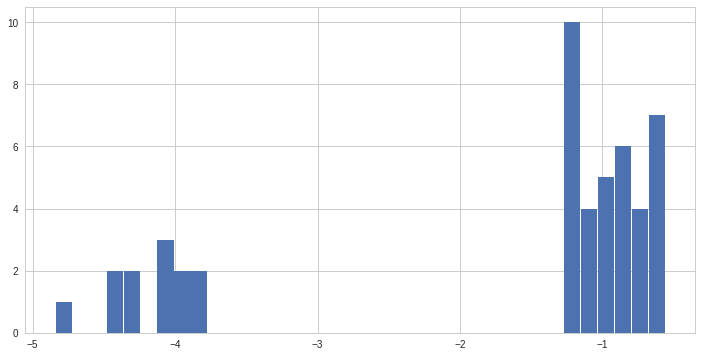

In [262]:
plt.hist(wp, 36, rwidth=0.95)
np.std(wp)